**1. Dataset Loading**

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
bapok_df = pd.read_csv('harga_bapokting_surabaya.csv')

In [3]:
bapok_df.shape

(1521, 26)

In [4]:
bapok_df.head()

,Tanggal,Beras Premium,Beras Medium,Beras SPHP,Jagung Tk Peternak,Kedelai Biji Kering (Impor),Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Cabai Merah Besar,...,Minyak Goreng Curah,Tepung Terigu (Curah),Minyakita,Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Daging Kerbau Beku (Impor),Daging Kerbau Segar (Lokal)
0,01/03/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,02/03/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/03/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,04/03/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,05/03/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2. Data Pre-Processing**

In [5]:
#checking for null values
bapok_df.isna().sum()

Tanggal                        0
Beras Premium                  0
Beras Medium                   0
Beras SPHP                     0
Jagung Tk Peternak             0
Kedelai Biji Kering (Impor)    0
Bawang Merah                   0
Bawang Putih Bonggol           0
Cabai Merah Keriting           0
Cabai Merah Besar              0
Daging Sapi Murni              0
Cabai Rawit Merah              0
Daging Ayam Ras                0
Telur Ayam Ras                 0
Gula Konsumsi                  0
Minyak Goreng Kemasan          0
Minyak Goreng Curah            0
Tepung Terigu (Curah)          0
Minyakita                      0
Tepung Terigu Kemasan          0
Ikan Kembung                   0
Ikan Tongkol                   0
Ikan Bandeng                   0
Garam Konsumsi                 0
Daging Kerbau Beku (Impor)     0
Daging Kerbau Segar (Lokal)    0
dtype: int64

In [6]:
(bapok_df == 0).sum()
(bapok_df == 0).mean() * 100  # dalam persen

Tanggal                          0.000000
Beras Premium                   14.595661
Beras Medium                    14.595661
Beras SPHP                      84.418146
Jagung Tk Peternak              78.040763
Kedelai Biji Kering (Impor)     37.278107
Bawang Merah                    14.595661
Bawang Putih Bonggol            14.595661
Cabai Merah Keriting            14.595661
Cabai Merah Besar               92.636423
Daging Sapi Murni               14.595661
Cabai Rawit Merah               14.595661
Daging Ayam Ras                 14.595661
Telur Ayam Ras                  14.595661
Gula Konsumsi                   14.595661
Minyak Goreng Kemasan           14.661407
Minyak Goreng Curah             35.568705
Tepung Terigu (Curah)           14.595661
Minyakita                       92.636423
Tepung Terigu Kemasan           51.873767
Ikan Kembung                    49.638396
Ikan Tongkol                    48.191979
Ikan Bandeng                    46.679816
Garam Konsumsi                  51

In [7]:
# Hitung jumlah nilai 0 per kolom
zero_counts = (bapok_df == 0).sum()

# Hitung persentase nilai 0 per kolom
zero_percent = (bapok_df == 0).mean() * 100
# Drop kolom dengan lebih dari 15% nilai 0
threshold = 15
columns_to_drop = zero_percent[zero_percent > threshold].index
bapok_df = bapok_df.drop(columns=columns_to_drop)

# Cek ulang sisa kolom setelah drop
remaining_columns = bapok_df.columns

zero_counts_cleaned = (bapok_df == 0).sum()
zero_percent_cleaned = (bapok_df == 0).mean() * 100

remaining_columns, zero_counts_cleaned, zero_percent_cleaned

(Index(['Tanggal', 'Beras Premium', 'Beras Medium', 'Bawang Merah',
        'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Daging Sapi Murni',
        'Cabai Rawit Merah', 'Daging Ayam Ras', 'Telur Ayam Ras',
        'Gula Konsumsi', 'Minyak Goreng Kemasan', 'Tepung Terigu (Curah)'],
       dtype='object'),
 Tanggal                    0
 Beras Premium            222
 Beras Medium             222
 Bawang Merah             222
 Bawang Putih Bonggol     222
 Cabai Merah Keriting     222
 Daging Sapi Murni        222
 Cabai Rawit Merah        222
 Daging Ayam Ras          222
 Telur Ayam Ras           222
 Gula Konsumsi            222
 Minyak Goreng Kemasan    223
 Tepung Terigu (Curah)    222
 dtype: int64,
 Tanggal                   0.000000
 Beras Premium            14.595661
 Beras Medium             14.595661
 Bawang Merah             14.595661
 Bawang Putih Bonggol     14.595661
 Cabai Merah Keriting     14.595661
 Daging Sapi Murni        14.595661
 Cabai Rawit Merah        14.595

In [8]:
bapok_df = bapok_df.drop(columns=["Tepung Terigu (Curah)"])

In [9]:
bapok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tanggal                1521 non-null   object
 1   Beras Premium          1521 non-null   int64 
 2   Beras Medium           1521 non-null   int64 
 3   Bawang Merah           1521 non-null   int64 
 4   Bawang Putih Bonggol   1521 non-null   int64 
 5   Cabai Merah Keriting   1521 non-null   int64 
 6   Daging Sapi Murni      1521 non-null   int64 
 7   Cabai Rawit Merah      1521 non-null   int64 
 8   Daging Ayam Ras        1521 non-null   int64 
 9   Telur Ayam Ras         1521 non-null   int64 
 10  Gula Konsumsi          1521 non-null   int64 
 11  Minyak Goreng Kemasan  1521 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 142.7+ KB


In [10]:
#converting the dataype of 'Date' col to 'datetime'
bapok_df['Tanggal'] = pd.to_datetime(bapok_df['Tanggal'], dayfirst=True)

In [11]:
#making the 'Date' col as index
bapok_df.set_index('Tanggal', inplace = True)

In [12]:
# Fungsi untuk mengganti nol dengan rata-rata per bulan (fallback ke bulan berikut jika perlu)
def fill_zero_with_monthly_mean(df):
    df_filled = df.copy()
    
    for col in df.columns:
        for idx, value in df[col].items():
            if value == 0:
                bulan_ini = idx.to_period('M')
                nilai_bulan_ini = df_filled[col][df_filled.index.to_period('M') == bulan_ini]
                mean_bulan_ini = nilai_bulan_ini[nilai_bulan_ini != 0].mean()
                
                if pd.isna(mean_bulan_ini):  # jika bulan itu semua 0, cari bulan setelahnya
                    bulan_berikutnya = bulan_ini + 1
                    while True:
                        nilai_bulan_berikut = df_filled[col][df_filled.index.to_period('M') == bulan_berikutnya]
                        mean_bulan_berikut = nilai_bulan_berikut[nilai_bulan_berikut != 0].mean()
                        if not pd.isna(mean_bulan_berikut):
                            mean_bulan_ini = mean_bulan_berikut
                            break
                        bulan_berikutnya += 1
                
                # Bulatkan rata-rata menjadi bilangan bulat
                df_filled.at[idx, col] = int(mean_bulan_ini)  # Menggunakan int() untuk menghilangkan koma

    return df_filled

# Terapkan fungsi ini
bapok_df = fill_zero_with_monthly_mean(bapok_df)

# Cek apakah masih ada nilai 0
(bapok_df == 0).sum()


Beras Premium            0
Beras Medium             0
Bawang Merah             0
Bawang Putih Bonggol     0
Cabai Merah Keriting     0
Daging Sapi Murni        0
Cabai Rawit Merah        0
Daging Ayam Ras          0
Telur Ayam Ras           0
Gula Konsumsi            0
Minyak Goreng Kemasan    0
dtype: int64

In [13]:
bapok_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1521 entries, 2021-03-01 to 2025-04-29
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Beras Premium          1521 non-null   int64
 1   Beras Medium           1521 non-null   int64
 2   Bawang Merah           1521 non-null   int64
 3   Bawang Putih Bonggol   1521 non-null   int64
 4   Cabai Merah Keriting   1521 non-null   int64
 5   Daging Sapi Murni      1521 non-null   int64
 6   Cabai Rawit Merah      1521 non-null   int64
 7   Daging Ayam Ras        1521 non-null   int64
 8   Telur Ayam Ras         1521 non-null   int64
 9   Gula Konsumsi          1521 non-null   int64
 10  Minyak Goreng Kemasan  1521 non-null   int64
dtypes: int64(11)
memory usage: 174.9 KB


In [14]:
#sort the indexes
bapok_df.sort_index(inplace = True)

In [15]:
bapok_df.head()

,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan
Tanggal,,,,,,,,,,,
2021-03-01,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-02,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-03,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-04,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-05,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578


In [16]:
#normalizing the data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(bapok_df[bapok_df.columns])

In [17]:
scaled_values

array([[0.17807018, 0.27419355, 0.31677358, ..., 0.28361111, 0.14814815,
        0.1315    ],
       [0.17807018, 0.27419355, 0.31677358, ..., 0.28361111, 0.14814815,
        0.1315    ],
       [0.17807018, 0.27419355, 0.31677358, ..., 0.28361111, 0.14814815,
        0.1315    ],
       ...,
       [0.67982456, 0.67741935, 0.41509434, ..., 0.47222222, 0.96296296,
        0.72916667],
       [0.67982456, 0.67741935, 0.38154717, ..., 0.47222222, 0.98148148,
        0.72916667],
       [0.61403509, 0.67741935, 0.25786792, ..., 0.42594444, 0.88888889,
        0.63891667]])

In [18]:
#converting the array into dataframe
bapok_scaled_df = pd.DataFrame(scaled_values, columns = bapok_df.columns, index = bapok_df.index)

In [19]:
bapok_scaled_df.head()

,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan
Tanggal,,,,,,,,,,,
2021-03-01,0.17807,0.274194,0.316774,0.250647,0.369395,0.229885,0.644116,0.184167,0.283611,0.148148,0.1315
2021-03-02,0.17807,0.274194,0.316774,0.250647,0.369395,0.229885,0.644116,0.184167,0.283611,0.148148,0.1315
2021-03-03,0.17807,0.274194,0.316774,0.250647,0.369395,0.229885,0.644116,0.184167,0.283611,0.148148,0.1315
2021-03-04,0.17807,0.274194,0.316774,0.250647,0.369395,0.229885,0.644116,0.184167,0.283611,0.148148,0.1315
2021-03-05,0.17807,0.274194,0.316774,0.250647,0.369395,0.229885,0.644116,0.184167,0.283611,0.148148,0.1315


**3. Plotting the Columns**

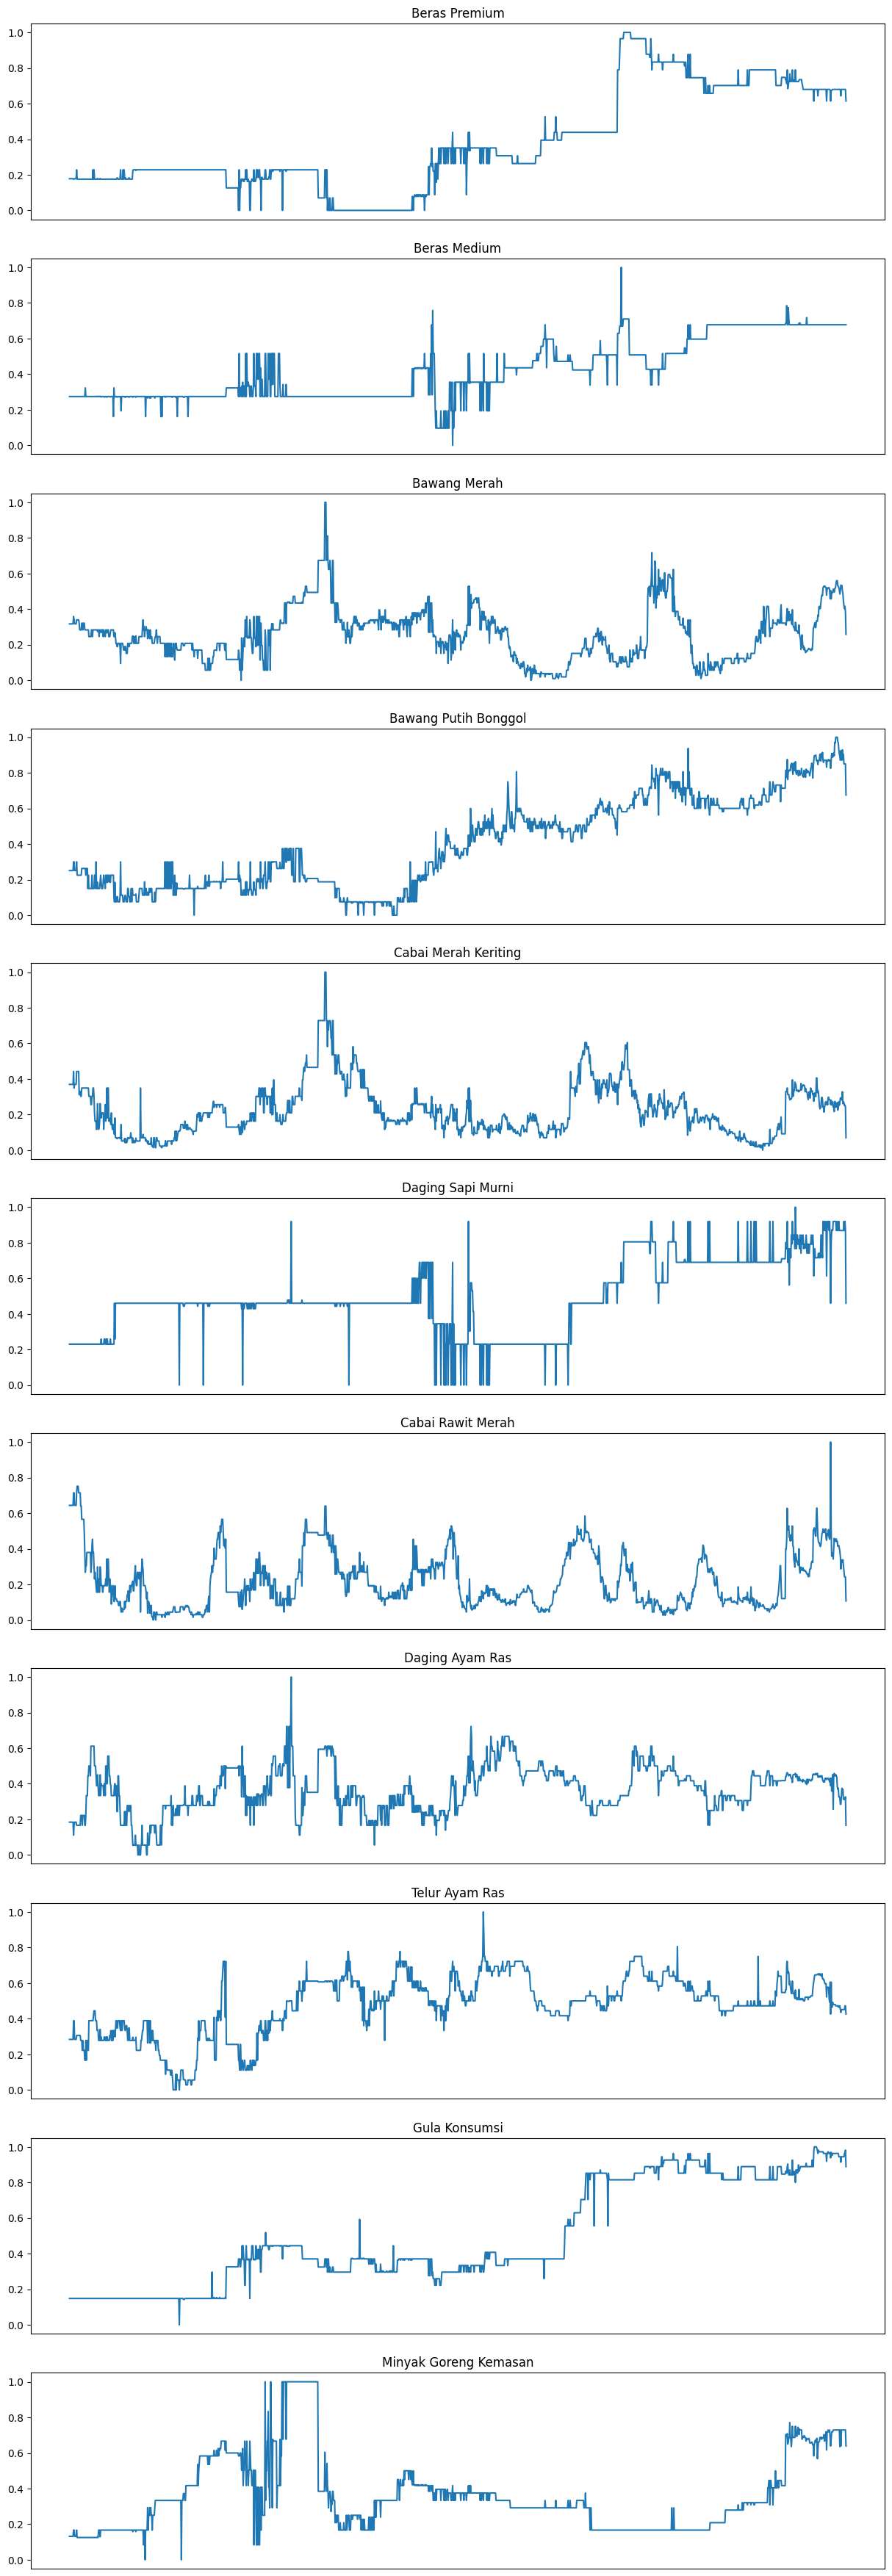

In [20]:
plt.rcParams['figure.figsize'] = (15, 45)
figure, axes = plt.subplots(11)

for ax, col in zip(axes, bapok_scaled_df.columns):
  ax.plot(bapok_scaled_df[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

**4. Create the Sliding Window Sequences**

In [21]:
window_size = 30

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(bapok_scaled_df, window_size)

In [22]:
X.shape, y.shape

((1491, 30, 11), (1491, 11))

In [23]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1192, 30, 11), (1192, 11), (299, 30, 11), (299, 11))

In [24]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(30, 11, 11)

**5.  Building the LSTM model**

In [25]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [27]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [28]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [ ]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

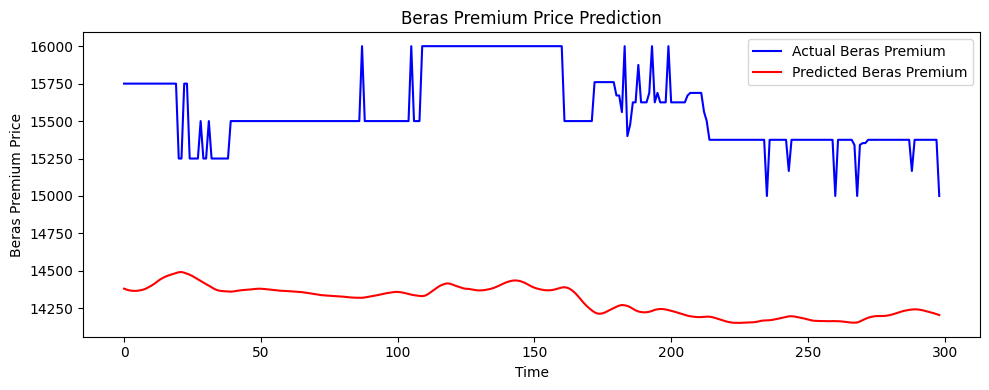

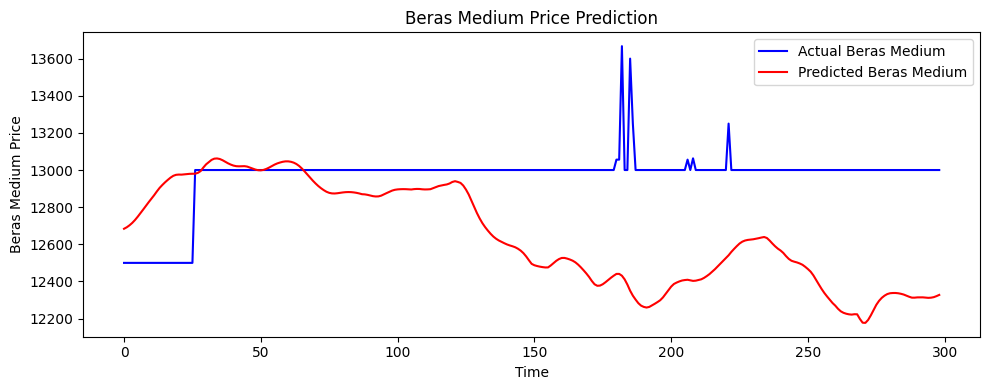

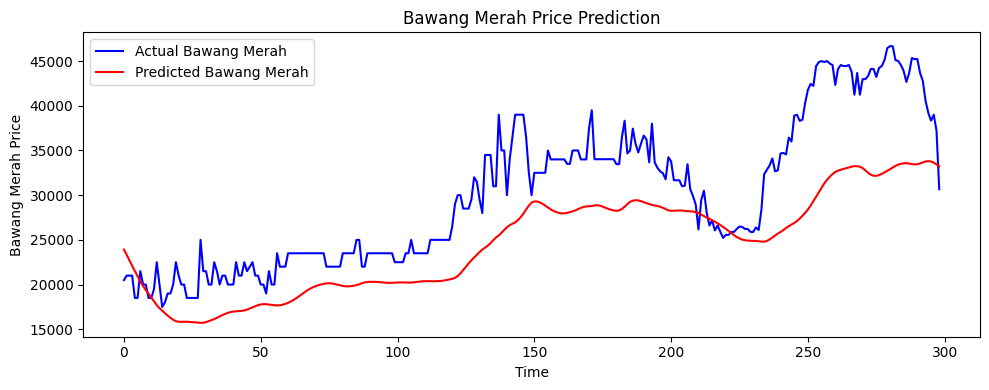

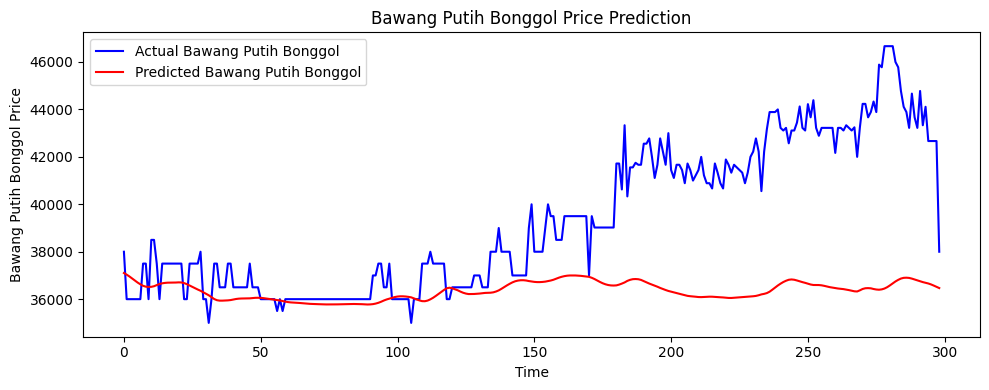

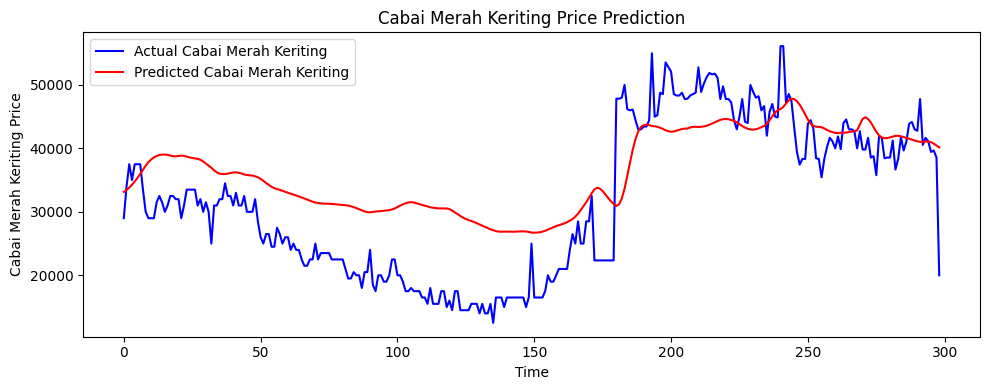

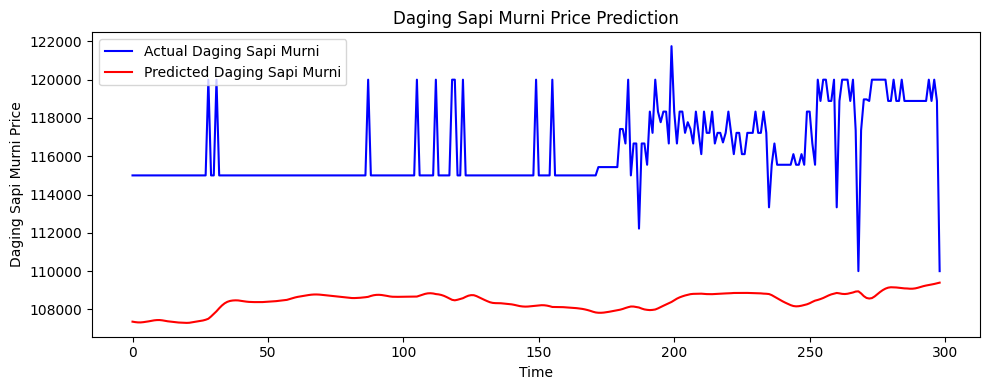

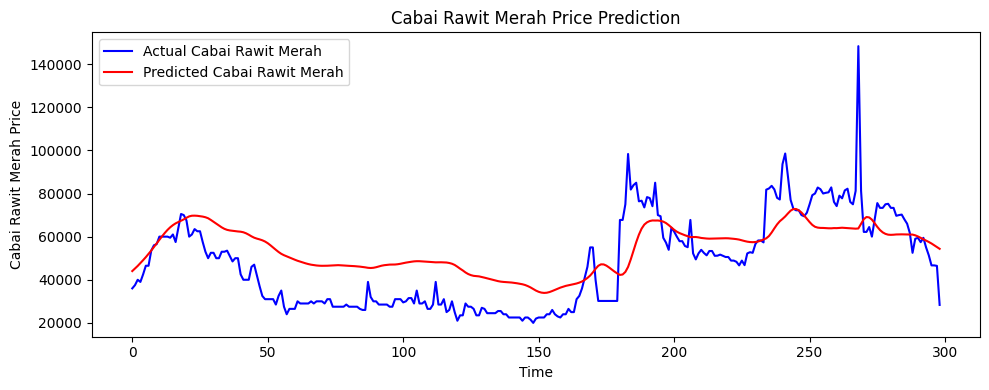

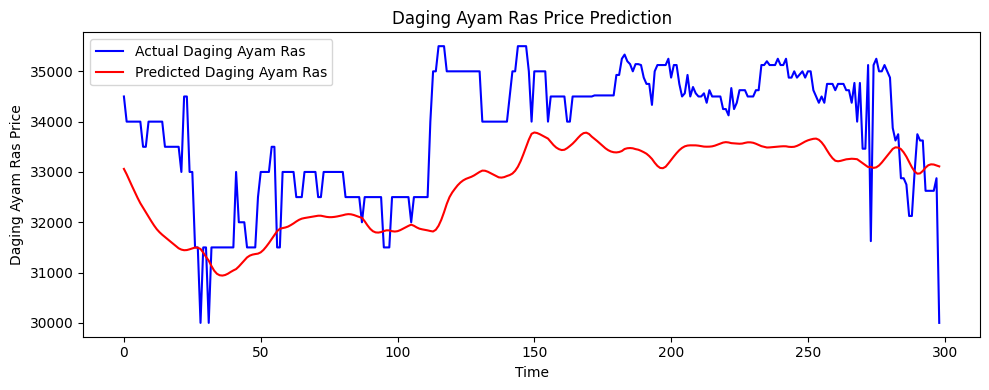

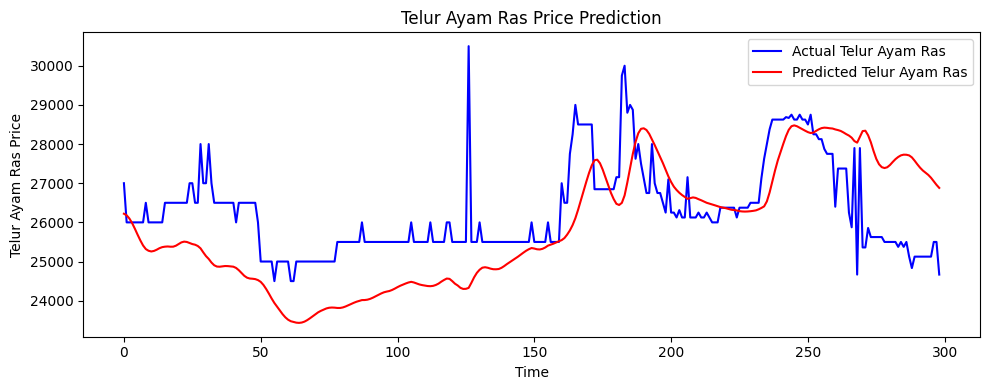

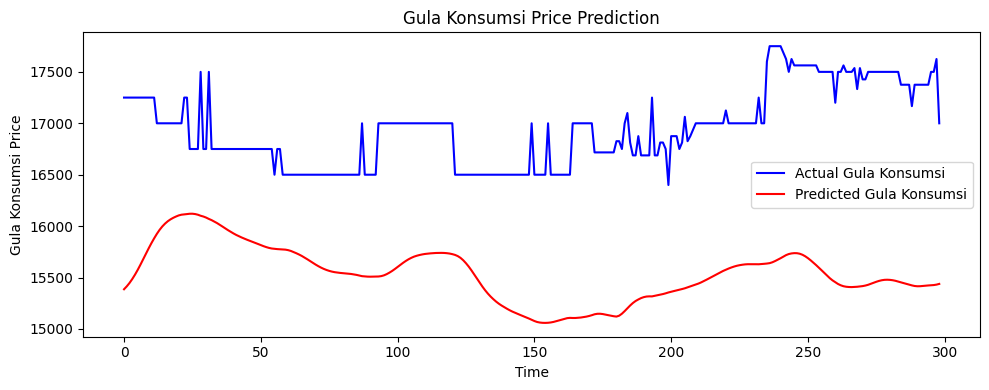

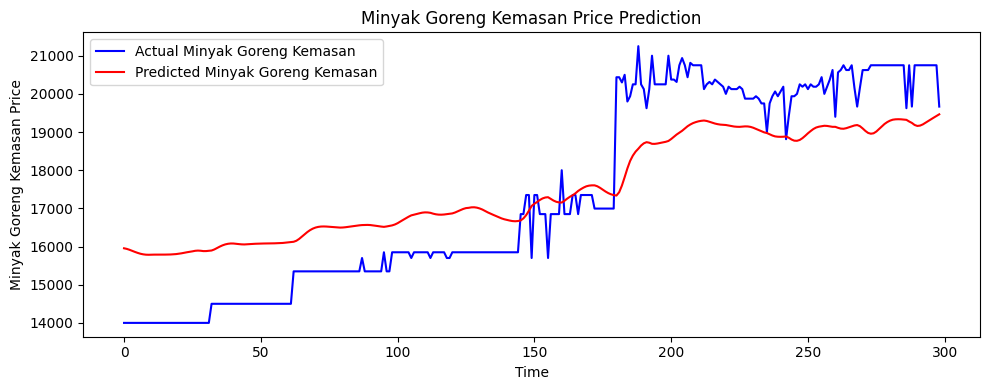

In [ ]:
import matplotlib.pyplot as plt

# Plot masing-masing komoditas secara terpisah
for i, col in enumerate(bapok_scaled_df.columns):
    plt.figure(figsize=(10, 4))  # Ukuran tiap plot
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Menyimpan model
model.save('lstm_bapokting.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
model = load_model('lstm_bapokting.keras')

Test Model dengan Data Baru

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load model LSTM
model = load_model("lstm_bapokting.keras")

# Path file data pasar
file_path = "harga_bapokting_pasar_genteng.xlsx"
nama_pasar = "Genteng"

In [ ]:
# Kolom yang digunakan
selected_columns = [
    "Beras Premium", "Beras Medium", "Bawang Merah", "Bawang Putih Bonggol",
    "Cabai Merah Keriting", "Daging Sapi Murni", "Cabai Rawit Merah",
    "Daging Ayam Ras", "Telur Ayam Ras", "Gula Konsumsi",
    "Minyak Goreng Kemasan"
]

In [ ]:
sequence_length = 30

In [ ]:
# Fungsi membuat sequence LSTM
def prepare_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [ ]:
# Fungsi untuk menangani nilai 0 dengan rata-rata bulanan atau bulan berikutnya
def preprocess_zero_values(df, selected_columns):
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])
    df.set_index('Tanggal', inplace=True)

    for col in selected_columns:
        for date, value in df[col].items():
            if value == 0:
                bulan_ini = date.month
                tahun_ini = date.year

                # Ambil rata-rata nilai non-zero di bulan yang sama
                same_month_values = df[(df.index.month == bulan_ini) & 
                                       (df.index.year == tahun_ini) & 
                                       (df[col] != 0)][col]

                if not same_month_values.empty:
                    df.at[date, col] = same_month_values.mean()
                else:
                    # Ambil rata-rata bulan berikutnya
                    bulan_berikut = bulan_ini + 1
                    tahun_berikut = tahun_ini
                    if bulan_berikut > 12:
                        bulan_berikut = 1
                        tahun_berikut += 1

                    next_month_values = df[(df.index.month == bulan_berikut) & 
                                           (df.index.year == tahun_berikut) & 
                                           (df[col] != 0)][col]

                    if not next_month_values.empty:
                        df.at[date, col] = next_month_values.mean()
                    # Jika masih kosong, biarkan 0 (bisa dikembangkan ke interpolasi)

    df.reset_index(inplace=True)
    return df

In [ ]:
# Fungsi prediksi dan visualisasi
def predict_and_plot(name, df, model):
    # Preprocessing nilai 0
    df = preprocess_zero_values(df, selected_columns)

    # Debug: tampilkan 5 data setelah preprocessing
    print("\nContoh 5 data setelah preprocessing:")
    print(df[['Tanggal'] + selected_columns].head(5))

    # Drop NA dan ambil kolom yang dipilih
    df = df[['Tanggal'] + selected_columns].dropna()
    df_values = df[selected_columns]

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_values)
    
    X, y_true = prepare_sequences(scaled, sequence_length)
    y_pred = model.predict(X)
    
    # Inverse scaling
    y_true_inv = scaler.inverse_transform(y_true)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Bulatkan hasil prediksi dan aktual menjadi bilangan bulat
    y_true_inv = np.round(y_true_inv).astype(int)
    y_pred_inv = np.round(y_pred_inv).astype(int)

    # Plot setiap variabel
    plt.figure(figsize=(20, 20))
    for i in range(len(selected_columns)):
        plt.subplot(6, 2, i + 1)
        plt.plot(y_true_inv[:, i], label='Actual')
        plt.plot(y_pred_inv[:, i], label='Predicted')
        plt.title(selected_columns[i])
        plt.legend()
    plt.suptitle(f"Prediksi vs Aktual - Pasar {name}", fontsize=20)
    plt.tight_layout()
    plt.show()

    # Hitung dan tampilkan RMSE
    print(f"\nRMSE per Komoditas ({name}):")
    for i, col in enumerate(selected_columns):
        rmse = np.sqrt(np.mean((y_true_inv[:, i] - y_pred_inv[:, i]) ** 2))
        print(f"{col:<25}: {rmse:.2f}")


Contoh 5 data setelah preprocessing:
     Tanggal  Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
0 2025-03-01          14500         12500         30000                 40000   
1 2025-03-02          14500         12500         30000                 40000   
2 2025-03-03          14500         12500         34000                 40000   
3 2025-03-04          14500         12500         34000                 40000   
4 2025-03-05          14500         12500         35000                 40000   

   Cabai Merah Keriting  Daging Sapi Murni  Cabai Rawit Merah  \
0                 55000             110000              80000   
1                 55000             110000              80000   
2                 65000             110000             120000   
3                 65000             110000             120000   
4                 50000             110000              70000   

   Daging Ayam Ras  Telur Ayam Ras  Gula Konsumsi  Minyak Goreng Kemasan  
0        

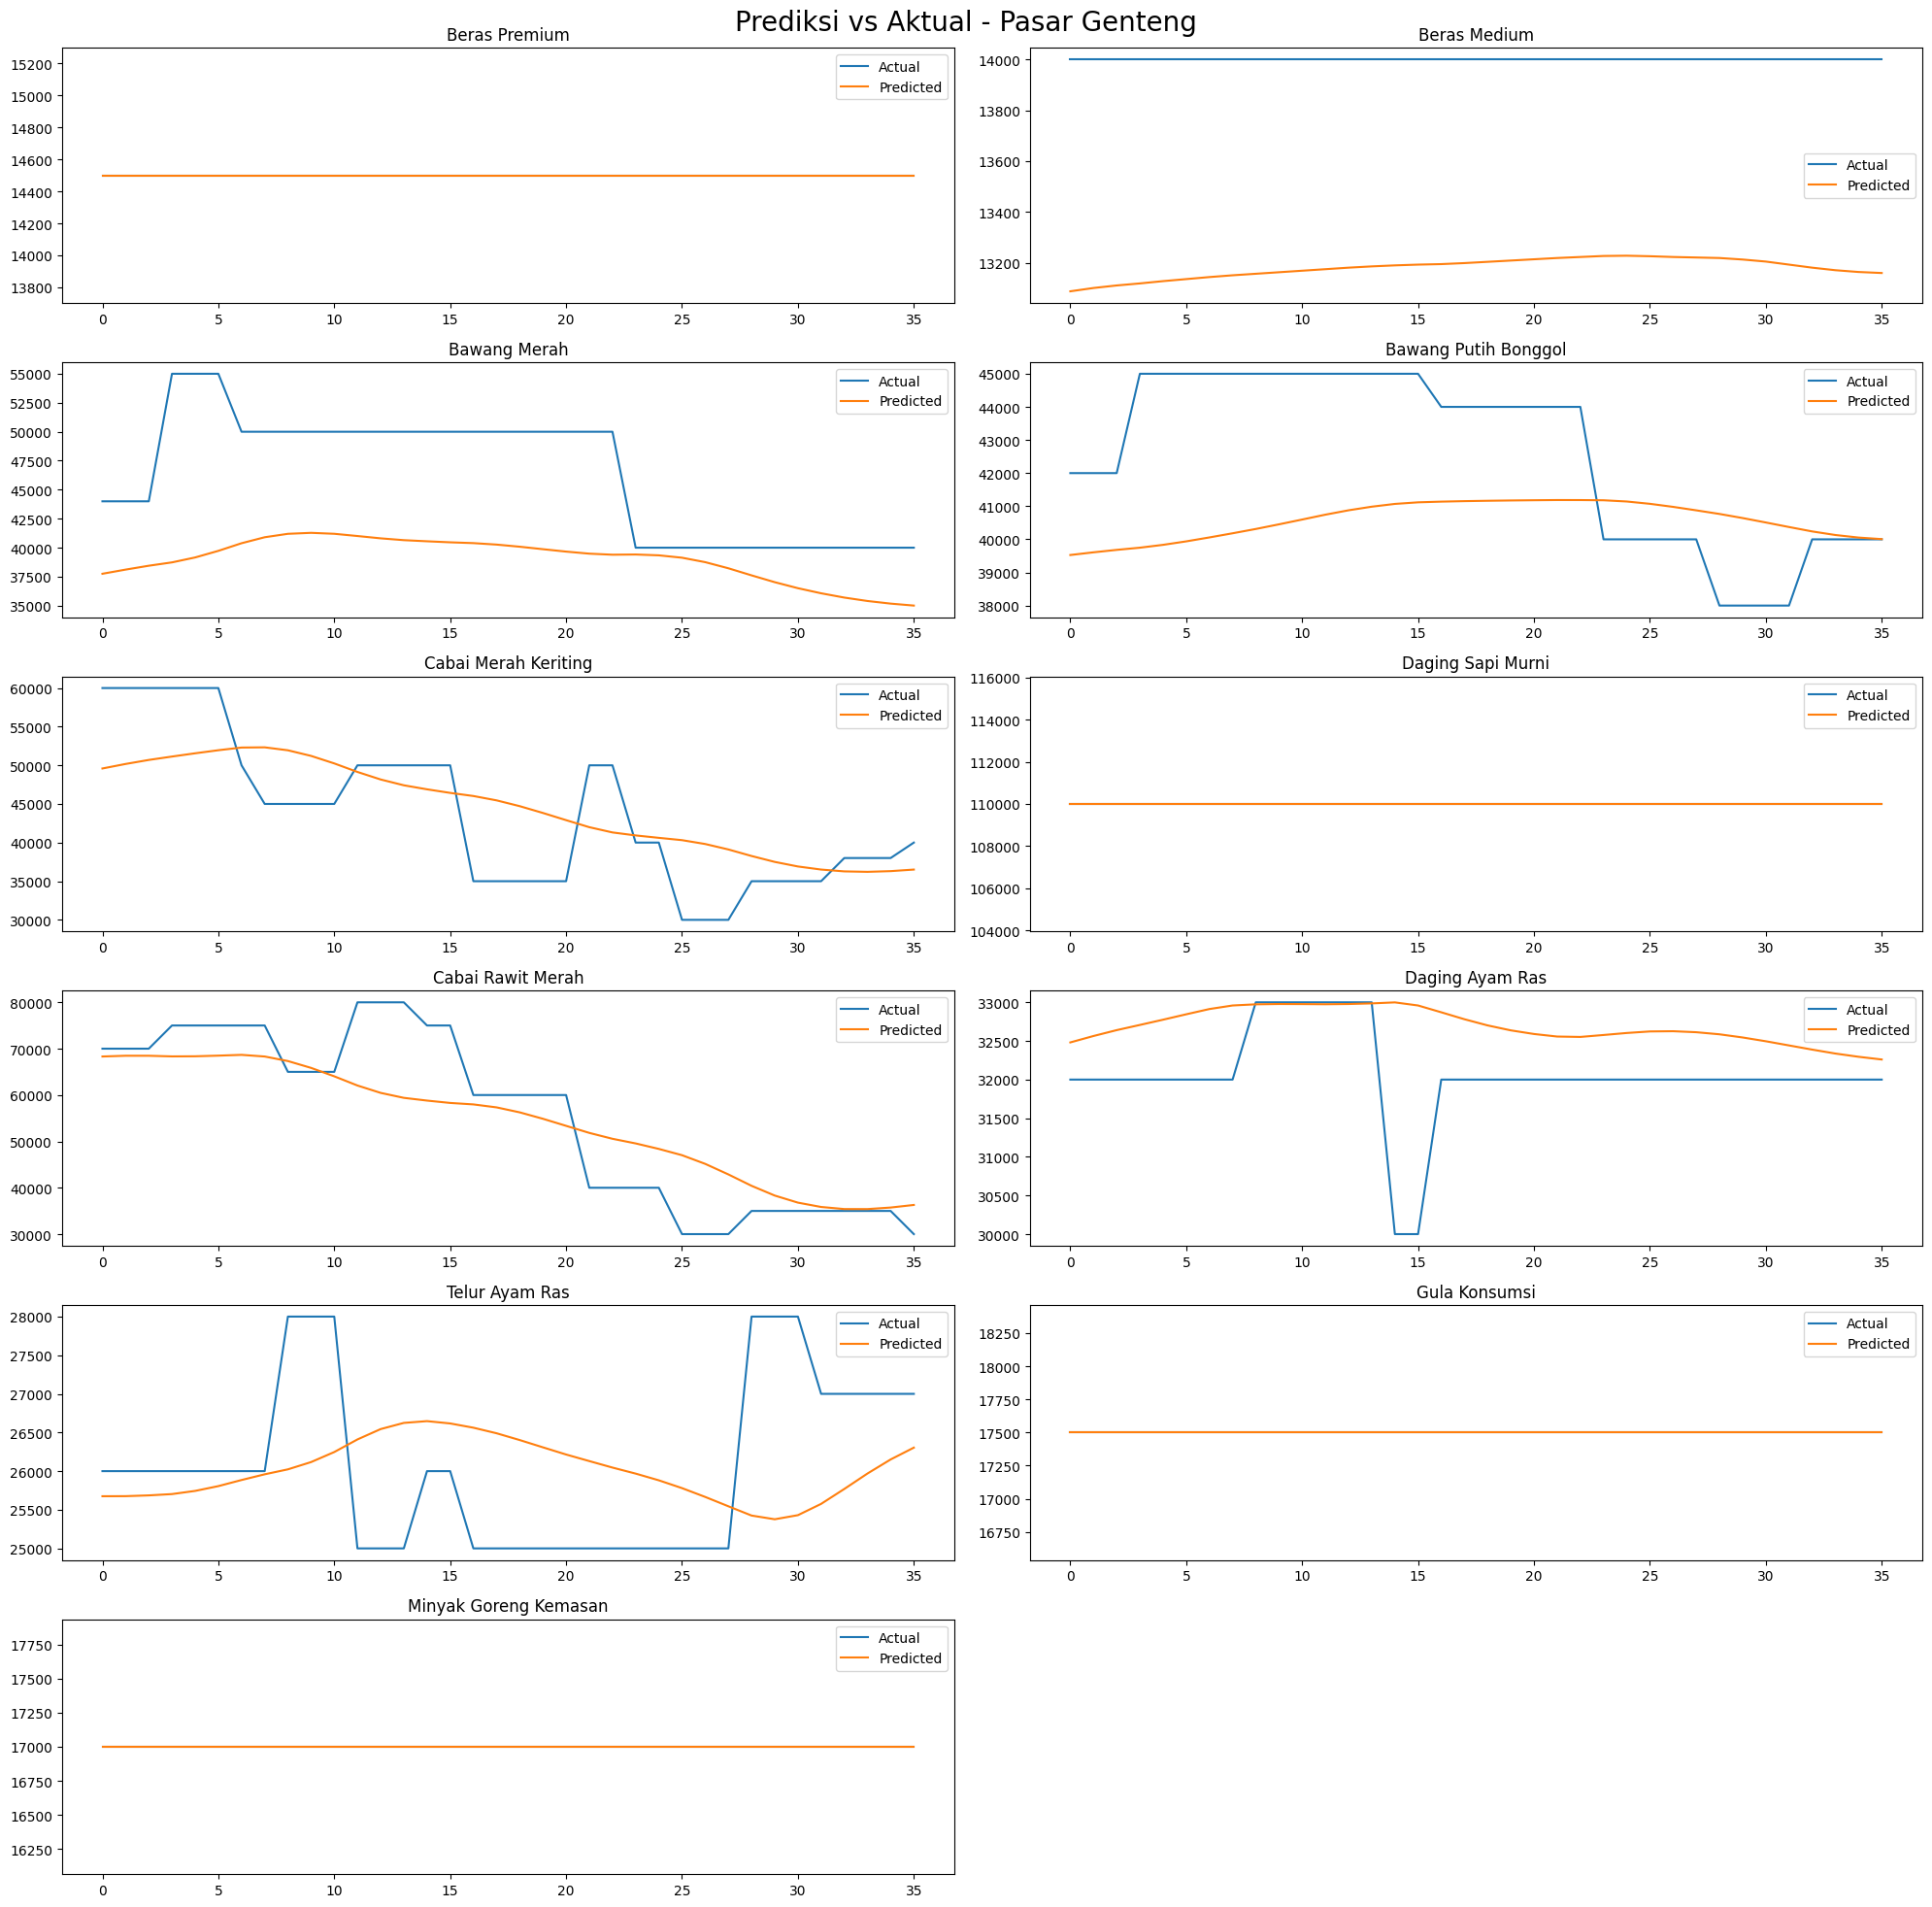


RMSE per Komoditas (Genteng):
Beras Premium            : 0.00
Beras Medium             : 820.71
Bawang Merah             : 8411.49
Bawang Putih Bonggol     : 3235.14
Cabai Merah Keriting     : 6768.27
Daging Sapi Murni        : 0.00
Cabai Rawit Merah        : 9396.82
Daging Ayam Ras          : 895.38
Telur Ayam Ras           : 1291.25
Gula Konsumsi            : 0.00
Minyak Goreng Kemasan    : 0.00


In [ ]:
# Load file dan jalankan prediksi
df = pd.read_excel(file_path)
predict_and_plot(nama_pasar, df, model)

Prediksi dengan dataset Baru

📈 Prediksi Harga 30 Hari ke Depan:
            Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
2025-05-06          14500         13159         34891                 39984   
2025-05-07          14500         13159         34758                 39968   
2025-05-08          14500         13157         34583                 39945   
2025-05-09          14500         13153         34376                 39911   
2025-05-10          14500         13145         34151                 39866   
2025-05-11          14500         13135         33923                 39812   
2025-05-12          14500         13123         33702                 39752   
2025-05-13          14500         13109         33494                 39689   
2025-05-14          14500         13096         33302                 39626   
2025-05-15          14500         13083         33125                 39566   
2025-05-16          14500         13071         32966                 39508   
2025-05-17       

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_5340\4224460961.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS1\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


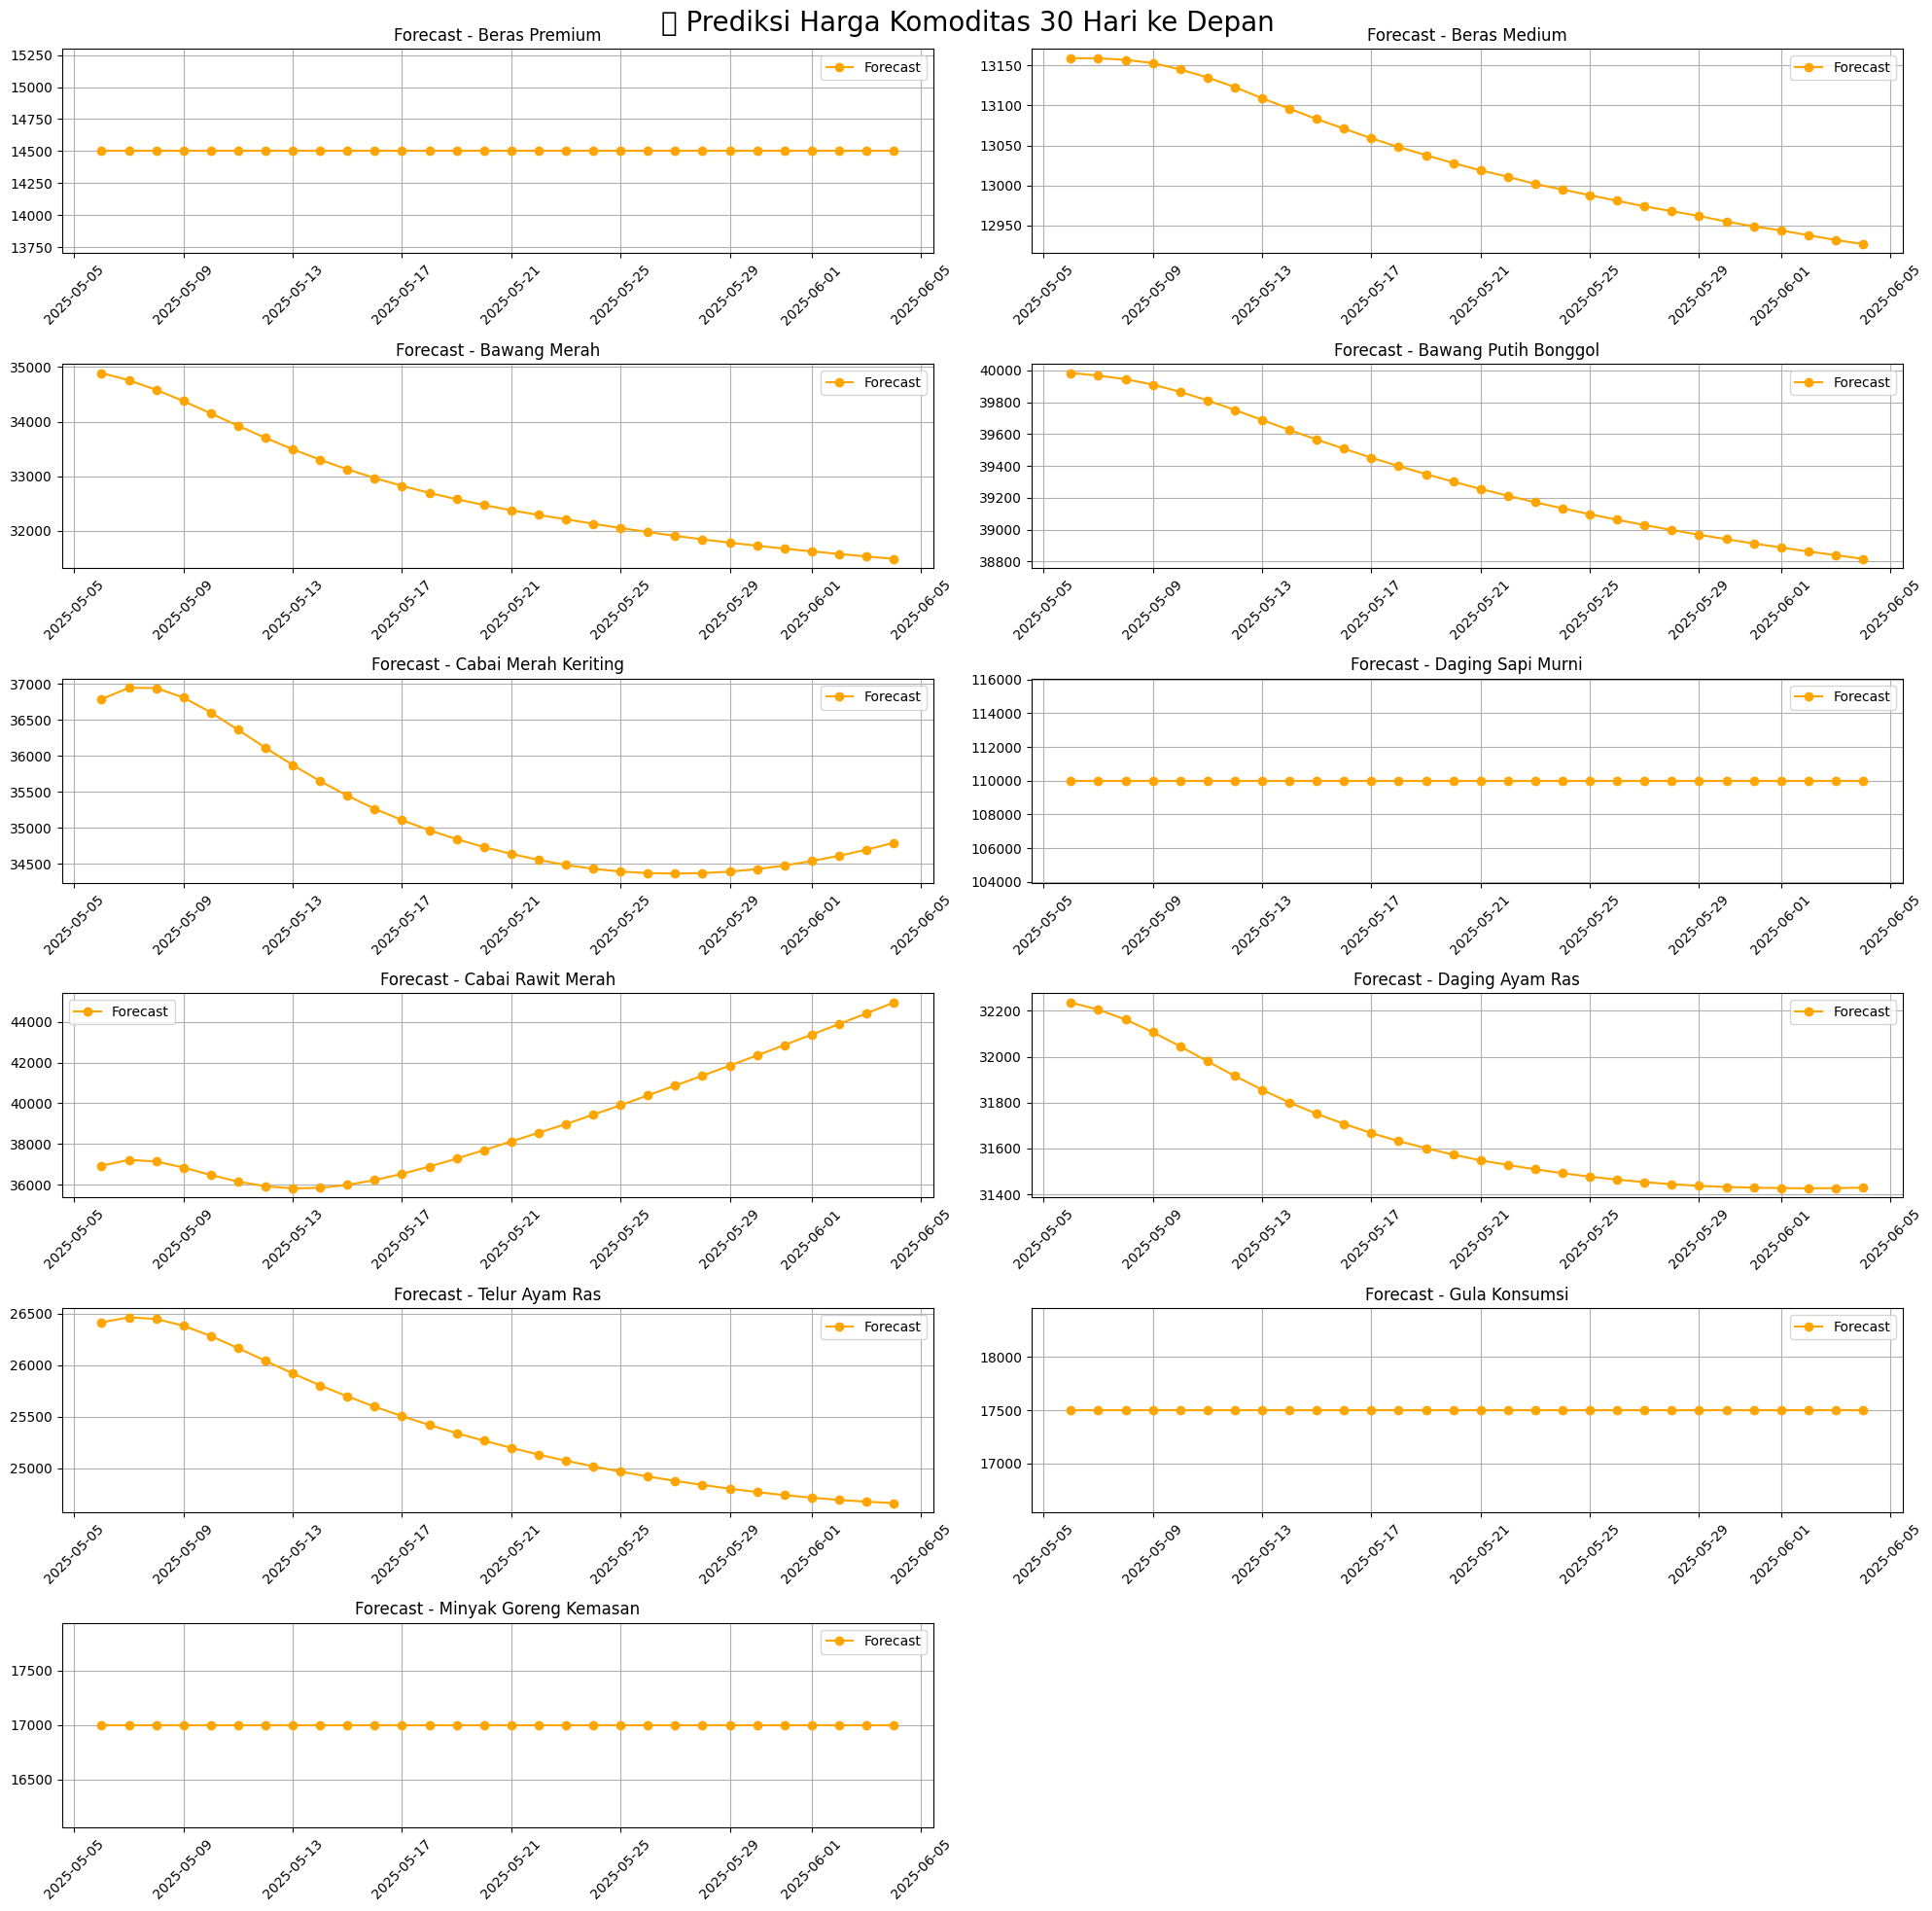

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file Excel
file_path = "harga_bapokting_pasar_genteng.xlsx"
df = pd.read_excel(file_path, index_col="Tanggal", parse_dates=True)

# Pastikan kolom yang akan digunakan sesuai dengan data yang ada di file
selected_columns = ['Beras Premium', 'Beras Medium', 'Bawang Merah', 'Bawang Putih Bonggol', 
                    'Cabai Merah Keriting', 'Daging Sapi Murni', 'Cabai Rawit Merah', 
                    'Daging Ayam Ras', 'Telur Ayam Ras', 'Gula Konsumsi', 
                    'Minyak Goreng Kemasan']

# Ambil hanya kolom terpilih dan hilangkan NaN
data = df[selected_columns].dropna()

# Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Tentukan sequence length dan ambil sequence terakhir dari data yang ada
sequence_length = 30
last_sequence = scaled_data[-sequence_length:]  # shape (60, n_features)
input_sequence = last_sequence[np.newaxis, :, :]  # shape (1, 60, n_features)

# Muat model LSTM yang sudah dilatih
model = load_model("lstm_bapokting.keras")  # Ganti dengan path model LSTM kamu

# Simpan hasil prediksi tereskalasi
n_future = 30  # Prediksi 30 hari ke depan
predictions_scaled = []

for _ in range(n_future):
    # Prediksi langkah berikutnya
    next_pred_scaled = model.predict(input_sequence, verbose=0)[0]  # shape: (n_features,)
    predictions_scaled.append(next_pred_scaled)

    # Perbarui sequence input: buang pertama, tambah prediksi di akhir
    new_sequence = np.vstack([input_sequence[0, 1:], next_pred_scaled])  # shape: (60, n_features)
    input_sequence = new_sequence[np.newaxis, :, :]  # shape: (1, 60, n_features)

# Invers transform hasil prediksi ke skala asli
predictions_scaled = np.array(predictions_scaled)
predictions = scaler.inverse_transform(predictions_scaled)

# Bulatkan hasil prediksi menjadi bilangan bulat tanpa koma
predictions = np.round(predictions).astype(int)

# Buat DataFrame hasil prediksi dengan index tanggal
last_date = pd.to_datetime(df.index[-1])  # Pastikan tanggal terakhir sudah dalam format datetime
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)
forecast_df = pd.DataFrame(predictions, columns=selected_columns, index=future_dates)

# Tampilkan hasil prediksi
print("📈 Prediksi Harga 30 Hari ke Depan:")
print(forecast_df)

# Visualisasi
plt.figure(figsize=(20, 20))
for i, col in enumerate(selected_columns):
    plt.subplot(6, 2, i + 1)
    plt.plot(forecast_df.index, forecast_df[col], marker='o', linestyle='-', color='orange', label='Forecast')
    plt.title(f"Forecast - {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
plt.suptitle("📊 Prediksi Harga Komoditas 30 Hari ke Depan", fontsize=20)
plt.tight_layout()
plt.show()
